In [3]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

import skimage
from skimage import util
import skimage.io as io
from skimage import exposure


In [2]:
def display(im3d, save_fig,step):
    fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(16, 14))

    vmin = im3d.min()
    vmax = im3d.max()
    hour=0
    
    for ax, image in zip(axes.flatten(), im3d[::step]):
        ax.imshow(image, cmap="gray", vmin=vmin, vmax=vmax)
        ax.set_xticks([])
        ax.set_title(str(hour)+" hour")
        ax.set_yticks([])
        frame=hour+step
        hour=hour+1
    fig.savefig("../results/for_presentation/"+save_fig,bbox_inch='tight')

def display_hist(im3d, save_fig, step):
    fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(16, 14))
    hour=0
    
    for ax, image in zip(axes.flatten(), im3d[::step]):
        ax.hist(image.ravel(),bins=256)
        ax.set_title(str(hour)+" hour")
        ax.set_ylim([0,300000])
        frame=hour+step
        ax.ticklabel_format(axis="y", style="scientific", scilimits=(0, 0))
        hour=hour+1
         
    fig.savefig("../results/for_presentation/"+save_fig)
    
def Plot_layer_time(img,Layer,CenterX,Step,plot_label):
    """
    cut and display  defined layer across time frames
    
    input: 
        img:     image
        Layer:   hight of the layer in px
        CenterY: y coordinats of the center of the layer
        Step:    number frames per hour
        plot_label: str title of the plot
    
    """
    NumFrames=img.shape[0]
    TimeFrame=range(0,NumFrames,Step)
    NumLayers=len(TimeFrame)
    
    ImgLayerStack=np.zeros([img.shape[1],NumLayers*Layer])
    Interval=np.array([0,Layer])
    
    plt.figure(figsize=(20,20))
    
    for i in TimeFrame:
        cut=img[i,:,CenterX-int(Layer/2):CenterX+int(Layer/2)].copy()
        ImgLayerStack[:,Interval[0]:Interval[1]]=cut
        #exposure.equalize_adapthist(cut,clip_limit=0.03)
        Interval=Interval+Layer
        
    
    plt.figure(figsize=(20,20))
    plt.imshow(ImgLayerStack,cmap=plt.cm.gray)
    
    # put hour label to the plot
    count=1
    text_x_coord=range(int(Layer/2),NumLayers*Layer,Layer)
    labels=[str(i)+'hr' for i in range(NumLayers)]
    
    print(text_x_coord)
    plt.xticks(text_x_coord, labels)
    plt.yticks([])
    plt.subplots_adjust(bottom=0.15)
    
    plt.title(plot_label)
    plt.savefig("../results/for_presentation/"+plot_label+".png",bbox_inches='tight')

In [ ]:
Experiments=["Maxime's_ancestor_ALI_original.tiff","20191125_taped plate.tif"]

In [4]:
images_Maxim=io.imread("../data/Maxime's_ancestor_ALI_original.tiff")
images_taped=io.imread("../data/20191125_taped plate.tif")
images_20191115=io.imread("../data/20191115_Maximes-light-settings__original.tif")
images_2020081_C0=io.imread("../data/20200814 Maximes light settings_01 _C=0.tif")
images_2020081_C1=io.imread("../data/20200814 Maximes light settings_01 _C=1.tif")

FileNotFoundError: [Errno 2] No such file or directory: "/Users/pichugina/Work/Data_Analysis/Microcolonies/Microcolonies_Michael_data/20200814_Experiment/data/Maxime's_ancestor_ALI_original.tiff"

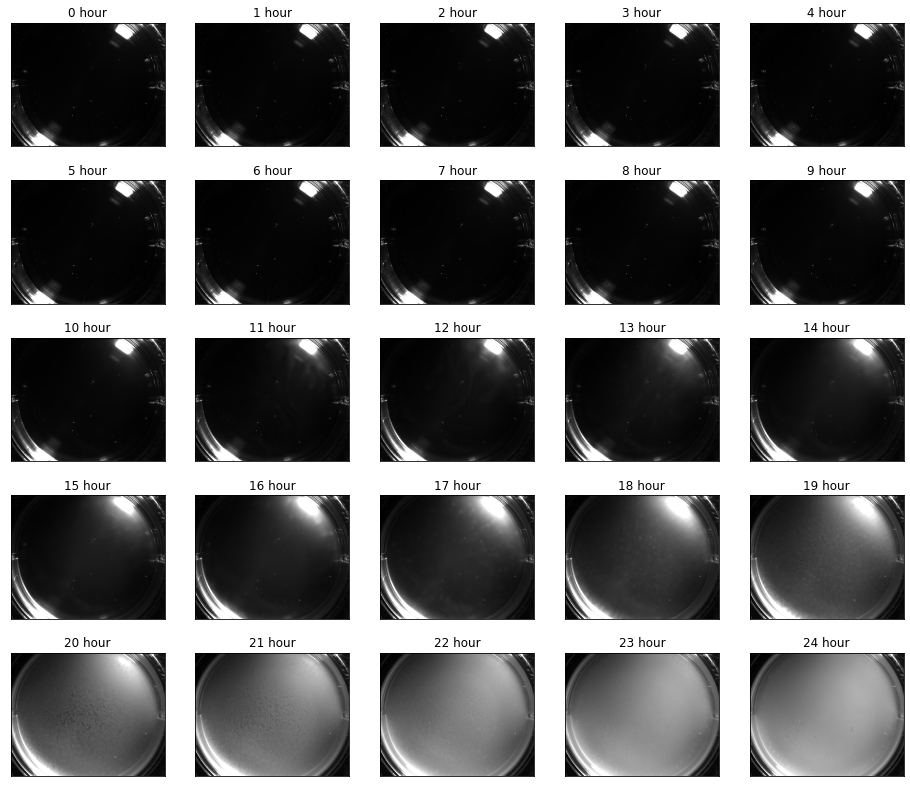

In [4]:
display(images, "20200814 Maximes light settings_01",step=12)


In [ ]:
def rescale_per_frame(img):
    vmin, vmax = np.percentile(img, q=(0.001, 95))
    #print(vmin, vmax)
    img_scaled = exposure.rescale_intensity(img,in_range=(vmin, vmax))
    return img_scaled

img_rescaled=np.zeros_like(images)
for frame in range(images.shape[0]):
    #print(frame)
    img_rescaled[frame,:,:] =rescale_per_frame(images[frame,:,:])


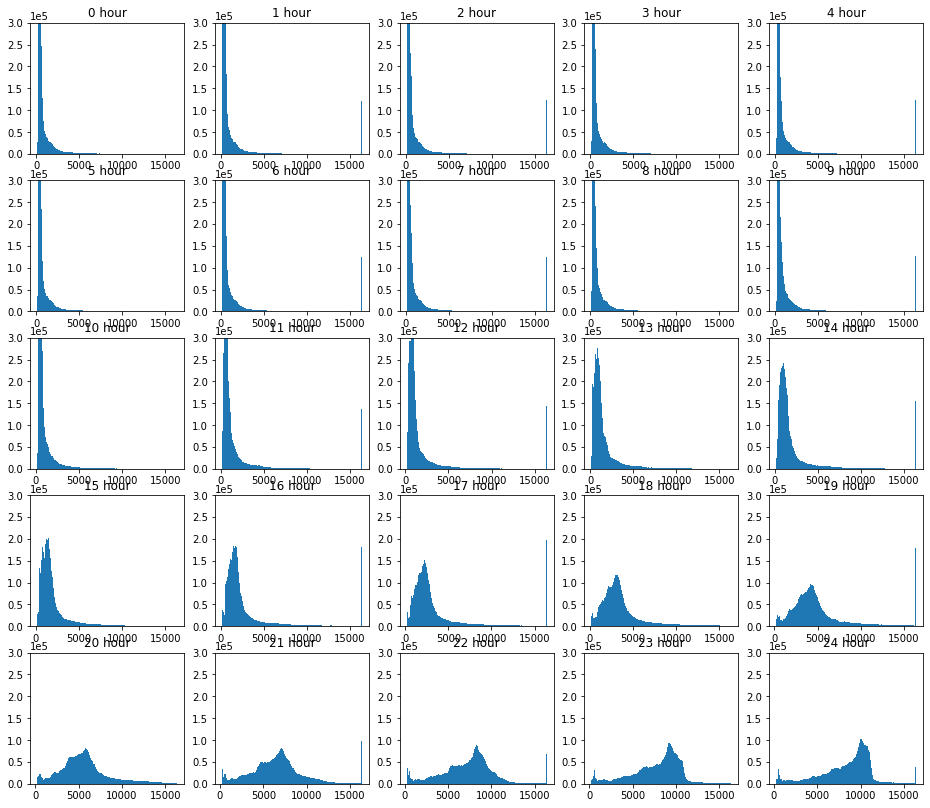

In [5]:
display_hist(images,"20200814 Maximes light settings_01_hist_overview",step=12)

In [15]:
Plot_layer_time(img_rescaled[:,1200:1300,:],100,1700,12,"20200814 Maximes light settings_01_layer")

NameError: name 'img_rescaled' is not defined

range(100, 5000, 200)


<Figure size 1440x1440 with 0 Axes>

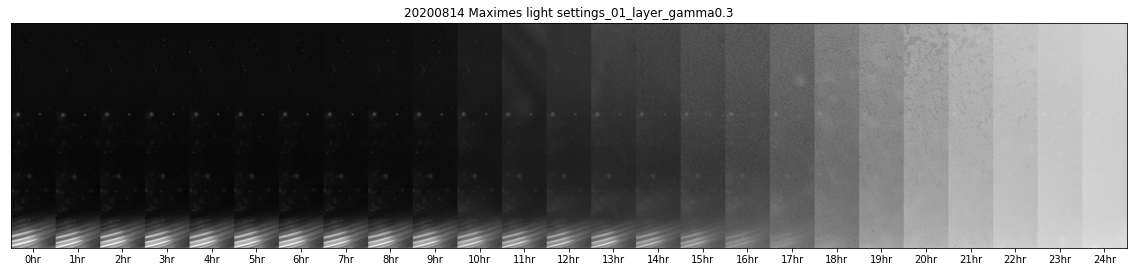

In [10]:
Plot_layer_time(exposure.adjust_gamma(images[:,1200:1300,:],0.3),100,1700,12,"20200814 Maximes light settings_01_layer_gamma0.3")